In [2]:
import pandas as pd
import altair as alt
from altair import datum
from IPython.display import display, HTML
alt.renderers.enable('notebook')
#alt.renderers.enable('default')

RendererRegistry.enable('notebook')

In [3]:
df= pd.read_csv('data/Otago-Chinese-naturalisations.csv', parse_dates=['ISO date'])

In [4]:
df['Age'] = df['Age'].str.replace(" Yrs", "")
df['Length of residence in NZ'] = df['Length of residence in NZ'].str.replace(" Yrs", "")
df['Age']= pd.to_numeric(df['Age'], errors='coerce')
df['Length of residence in NZ'] = pd.to_numeric(df['Length of residence in NZ'], errors='coerce')
df['Year of arrival'] = df['Year arrived in NZ'].str.replace("Not stated", "")
df['Year of arrival'] = pd.to_numeric(df['Year of arrival'], errors='coerce', downcast='integer')

In [4]:
df.head()

,Name,Chinese name,Chinese signature,Birthplace simplified,Birthdate,Year arrived in NZ,Occupation,Residence city,ISO date,Length of residence in NZ,Age,File no.,Certificate register,Register page no.,Notes,Year of arrival
0,William Ah Wong,Not stated,No,Canton,abt 1862,1874,Gardener,Port Chalmers,1883-07-30,9.00,21,1883/3052,16,97,No other records for 'William Ah Wong'.,1874.0
1,Chun Ah Dunn,Not stated,No,Canton,abt 1859,1873,Gardener,Clyde,1881-04-08,8.00,22,1881/1221,11,28,NaN,1873.0
2,Louis Hoy,雷海,Yes,Canton,abt 1861,1878,Miner,Hyde,1883-07-30,5.00,22,1883/2635,10,30,No other records for 'Louis Hoy'.,1878.0
3,Ah Poo,亞培,Yes,Canton,abt 1861,1880,Gardener,Vincent County – Conroy's Gully,1883-03-19,3.00,22,1883/989,16,25,NaN,1880.0
4,Chin Ben Sing,Not stated,No,Canton,abt 1885,1904,Laundryman,Dunedin,1907-02-07,3.25,22,20/4/456,48,12,Request for copy of letters (burnt in fire) in...,1904.0


## Ages

In [5]:
# Youngest
df['Age'].min()

21

In [6]:
# Oldest
df['Age'].max()

63

In [7]:
# Average
df['Age'].median()

38.0

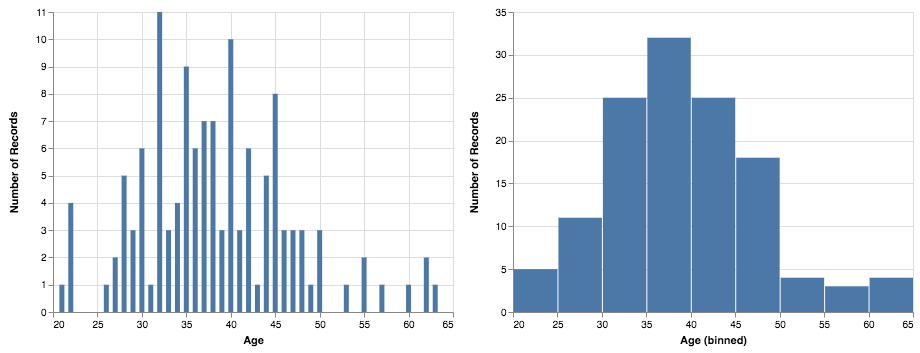

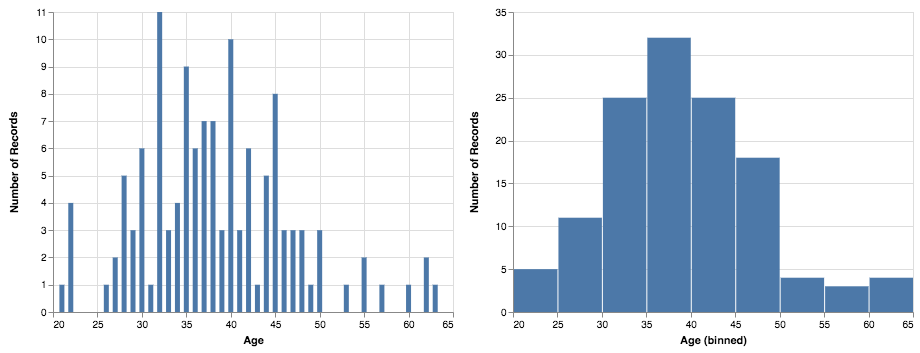

In [8]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    y='count()',
    tooltip=[alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)
chart.encode(x='Age') | chart.encode(alt.X('Age', bin=True))

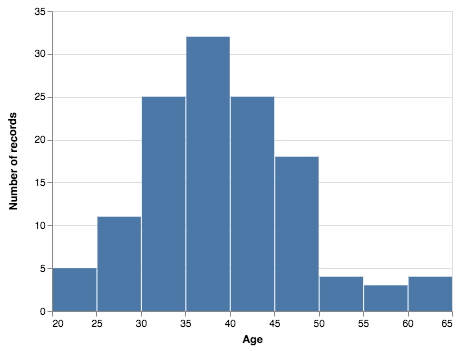

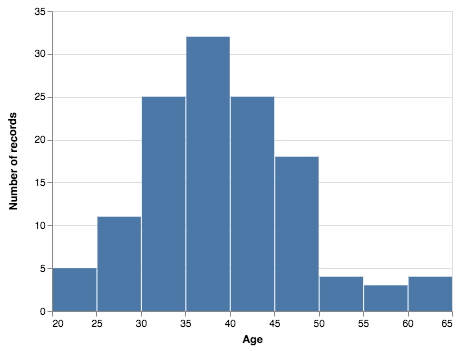

In [110]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Age', bin=True, title='Age'),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    tooltip=[alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)
chart

In [111]:
chart.save('age.html', scale_factor=5)

## Year of arrival

In [9]:
# Earliest
int(df['Year of arrival'].min())

1857

In [10]:
# Latest
int(df['Year of arrival'].max())

1904

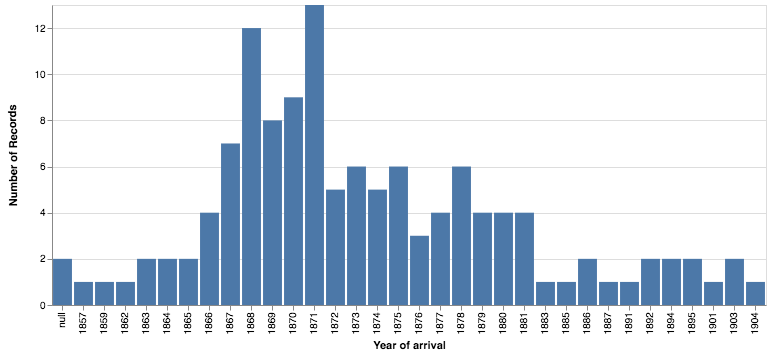

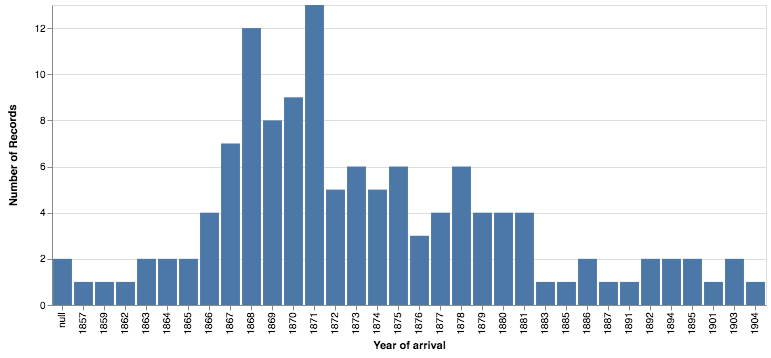

In [11]:
# Make some charts!
alt.Chart(df).mark_bar().encode(
    x='Year of arrival:O',
    y='count()',
    tooltip=['Year of arrival', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

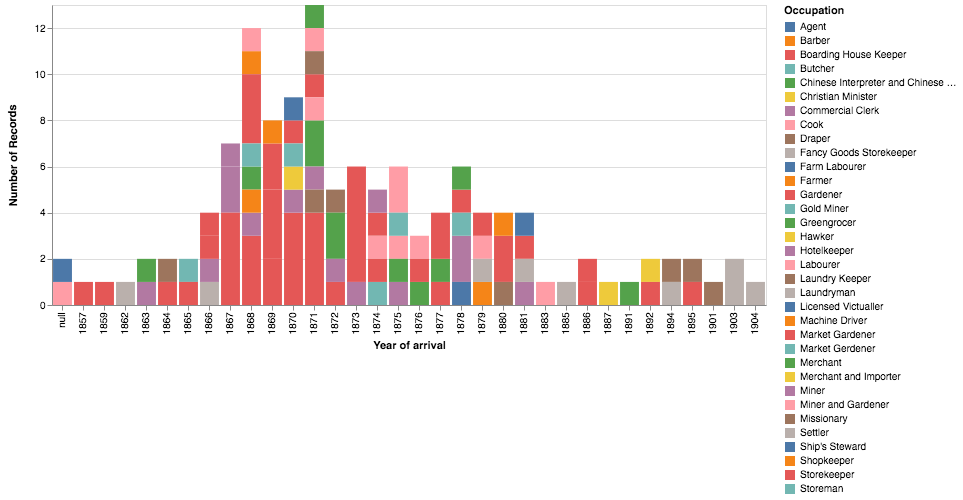

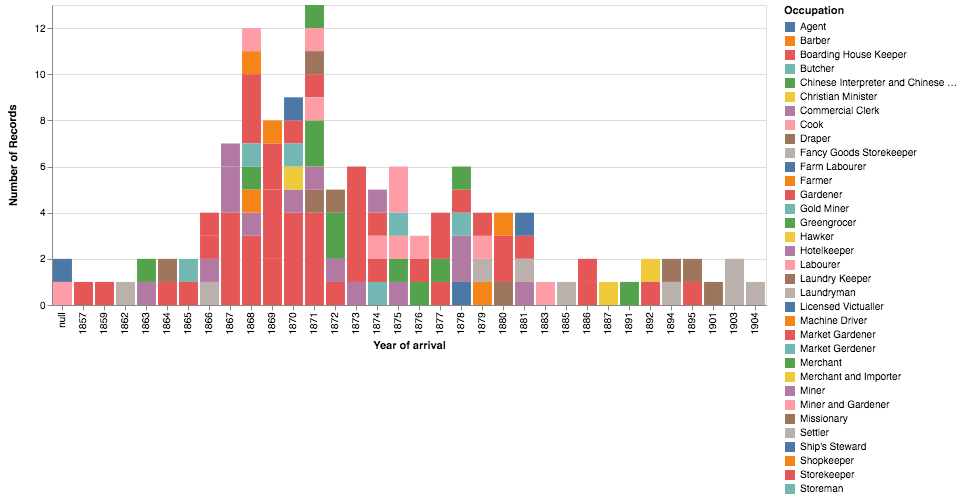

In [12]:
alt.Chart(df).mark_bar().encode(
    x='Year of arrival:O',
    y='count()',
    color='Occupation',
    tooltip=['Year of arrival', 'Occupation', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

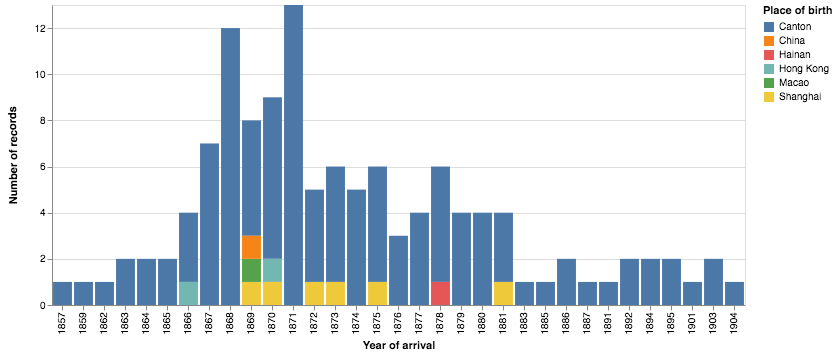

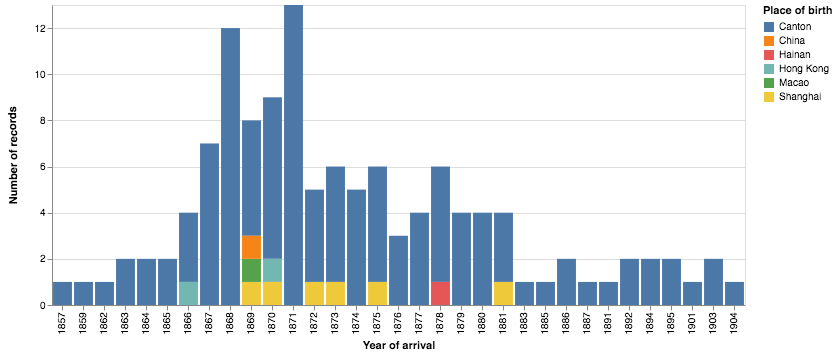

In [112]:
chart = alt.Chart(df).mark_bar().encode(
    x='Year of arrival:O',
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    color=alt.Color('Birthplace simplified', title='Place of birth'),
    tooltip=['Year of arrival', alt.Tooltip('Birthplace simplified', title='Birthplace'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).transform_filter(
    datum['Year of arrival'] != None
)
chart

In [113]:
chart.save('arrival-birthplace.html', scale_factor=5)

## Occupations

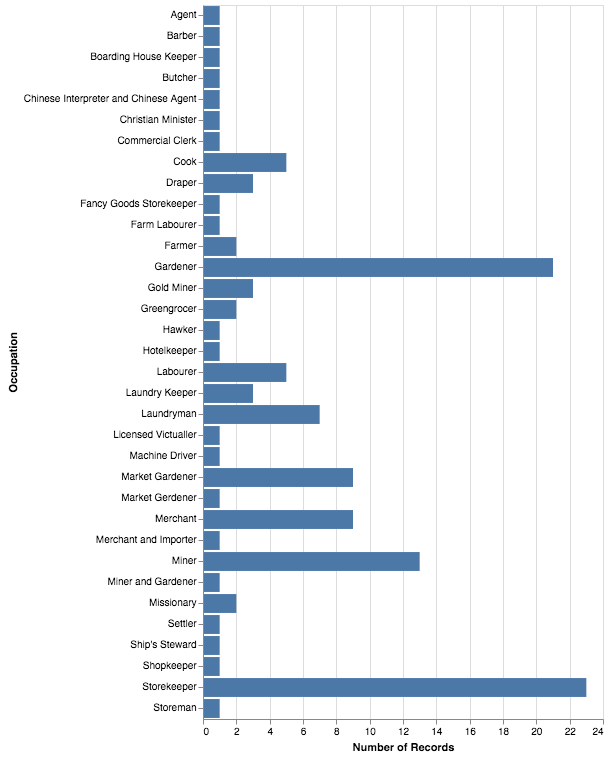

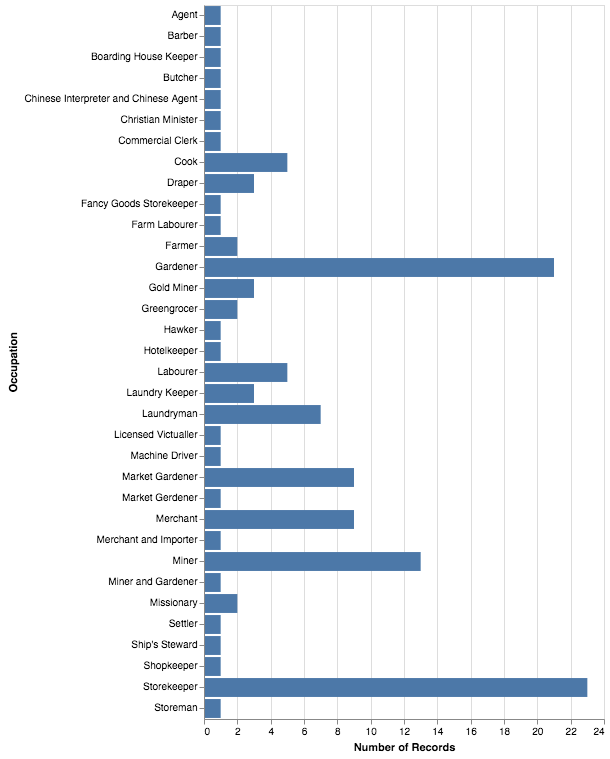

In [15]:
# Make some charts!
alt.Chart(df).mark_bar().encode(
    y='Occupation',
    x='count()',
    tooltip=['Occupation', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

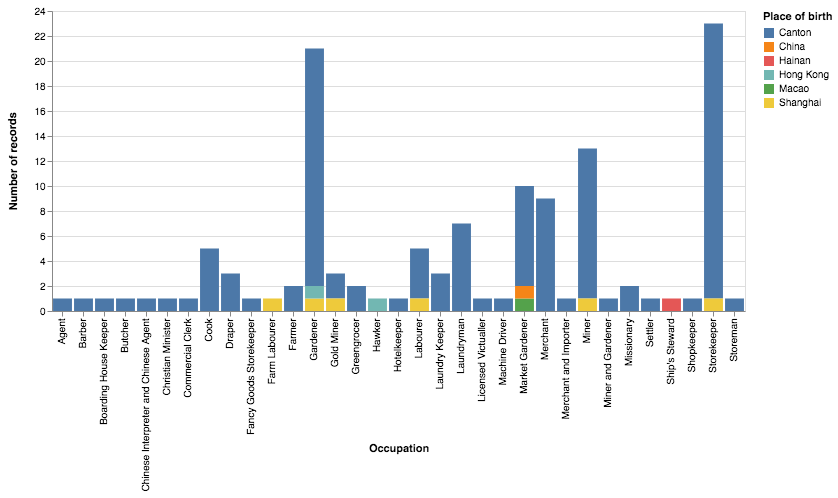

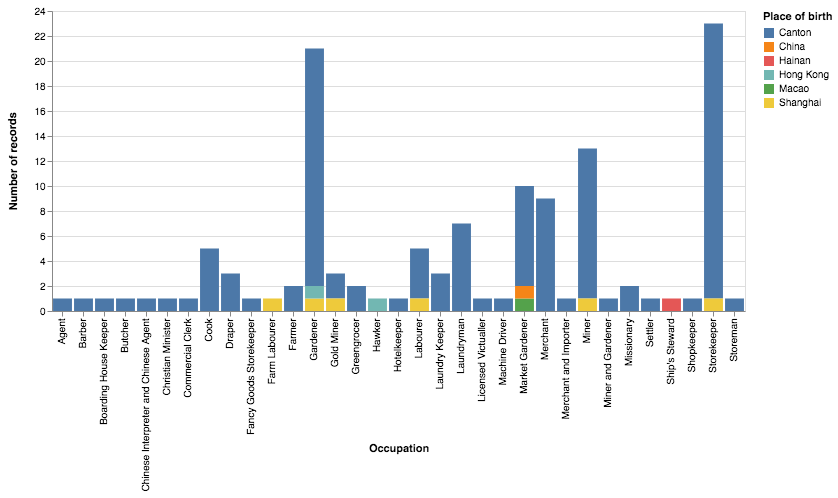

In [115]:
chart = alt.Chart(df).mark_bar().encode(
    x='Occupation',
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    color=alt.Color('Birthplace simplified', title='Place of birth'),
    tooltip=['Occupation', alt.Tooltip('Birthplace simplified', title='Birthplace'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).configure_axisX(titlePadding=-50)
chart

In [116]:
chart.save('occupation-birth.html', scale_factor=5)

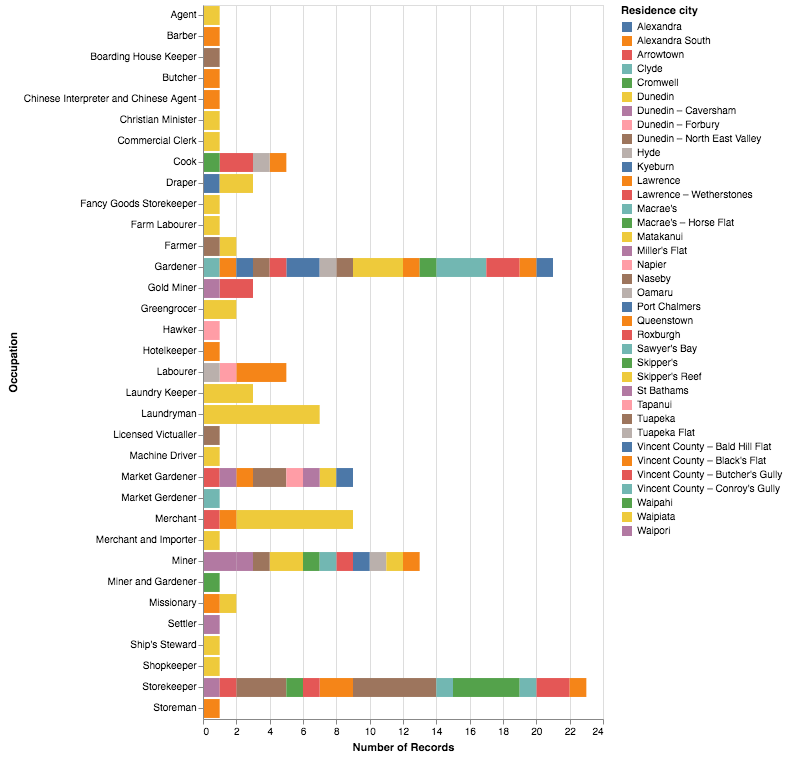

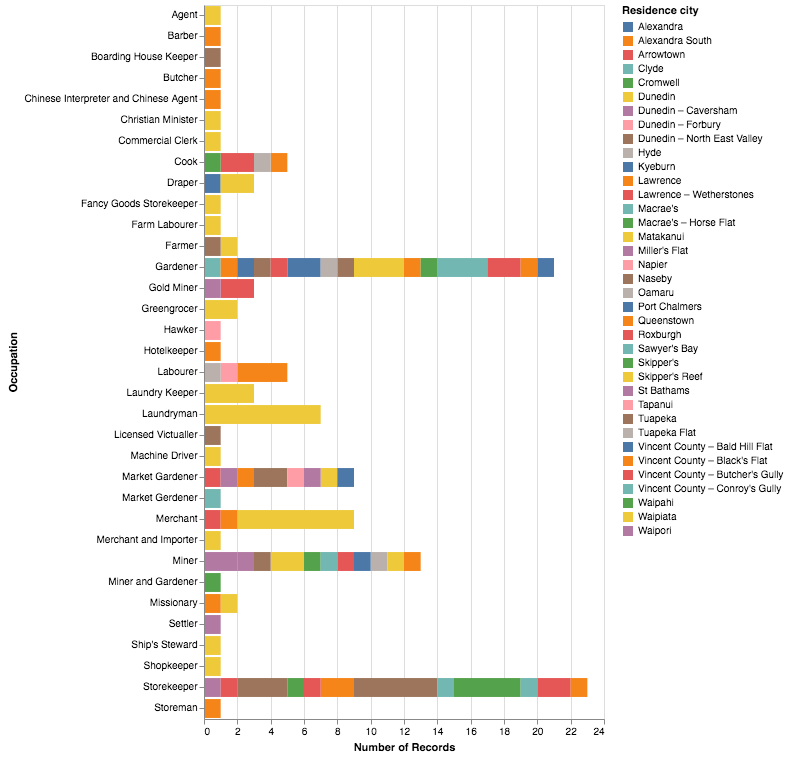

In [17]:
alt.Chart(df).mark_bar().encode(
    y='Occupation',
    x='count()',
    color='Residence city',
    tooltip=['Occupation', alt.Tooltip('Residence city', title='Residence'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

## Place of residence

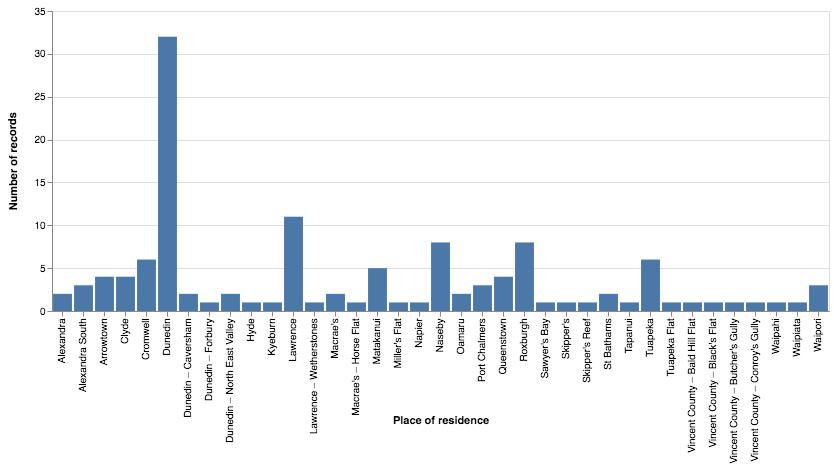

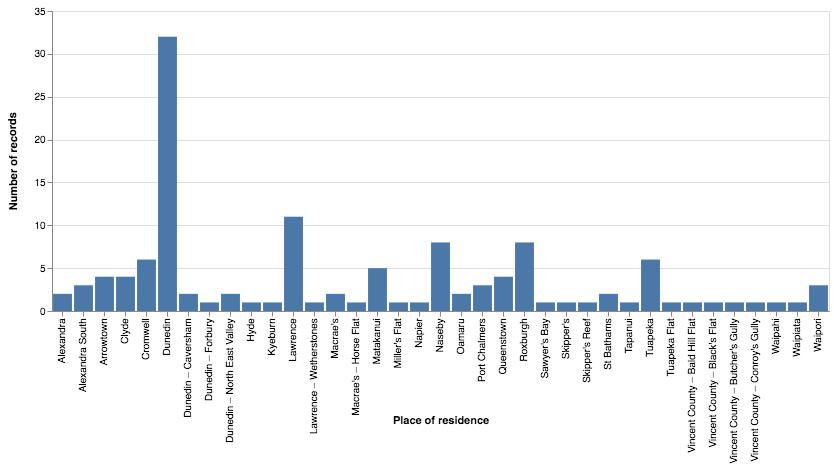

In [117]:
# Make some charts!
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Residence city', axis=alt.Axis(title='Place of residence')),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    tooltip=['Residence city', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).configure_axisX(titlePadding=-50)
chart

In [118]:
chart.save('residence.html', scale_factor=5)

## Date of naturalisation

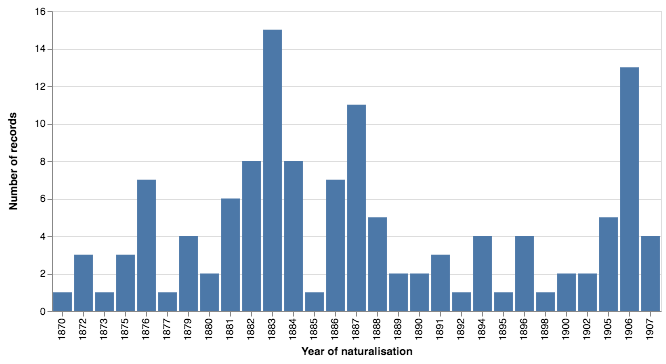

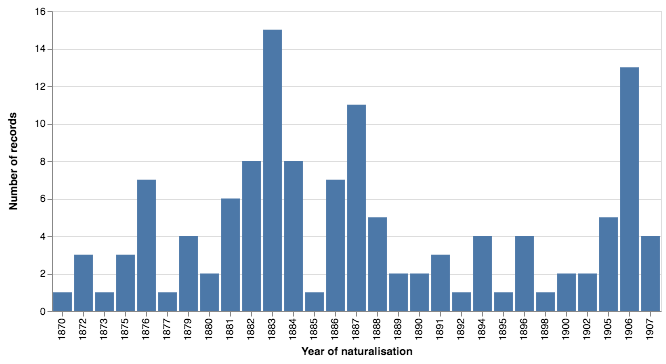

In [119]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('year(ISO date):O', title='Year of naturalisation'),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    tooltip=[alt.Tooltip('year(ISO date):O', title='Year'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)
chart

In [120]:
chart.save('naturalisation-year.html', scale_factor=5)

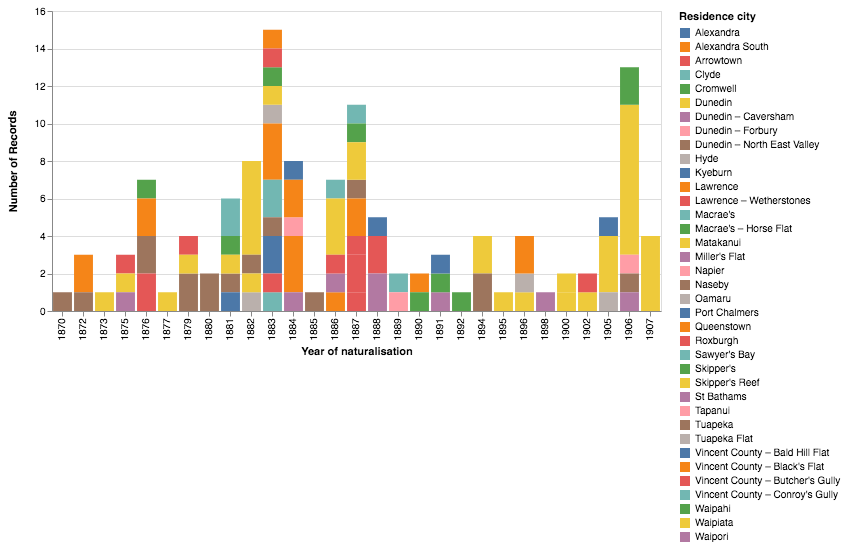

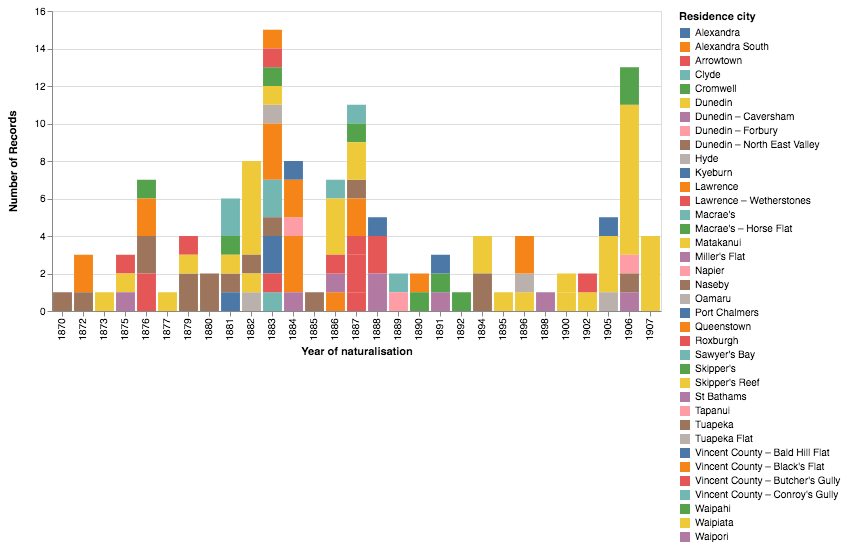

In [20]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('year(ISO date):O', title='Year of naturalisation'),
    y='count()',
    color='Residence city',
    tooltip=[alt.Tooltip('year(ISO date):O', title='Year'), alt.Tooltip('Residence city', title='Place'), alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

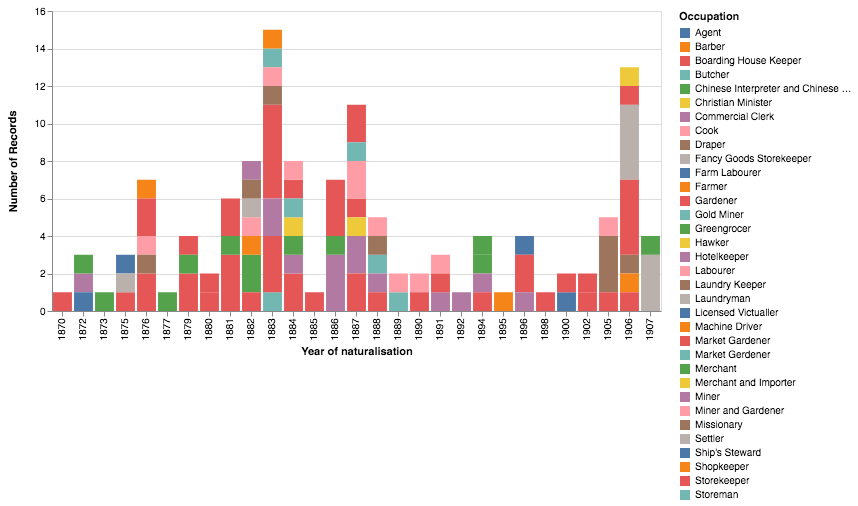

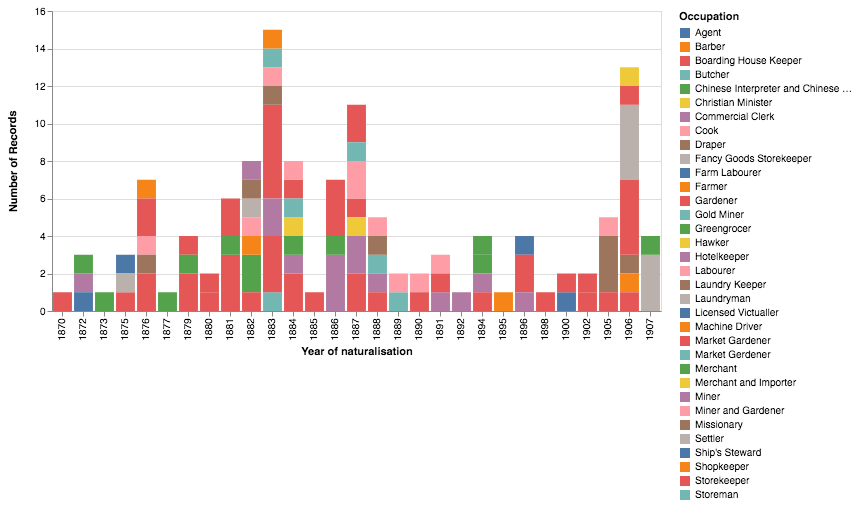

In [21]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('year(ISO date):O', title='Year of naturalisation'),
    y='count()',
    color='Occupation',
    tooltip=[alt.Tooltip('year(ISO date):O', title='Year'), 'Occupation', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)

## Length of residence

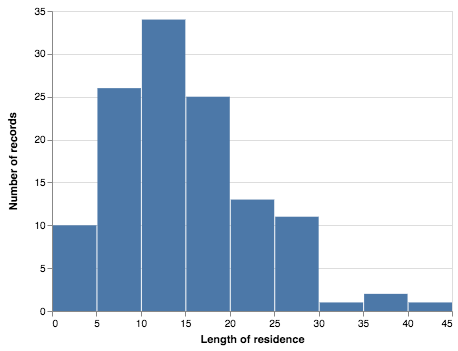

In [121]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Length of residence in NZ', bin=True, title='Length of residence'),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    tooltip=[alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
)
chart

In [122]:
chart.save('residence-length.html', scale_factor=5)

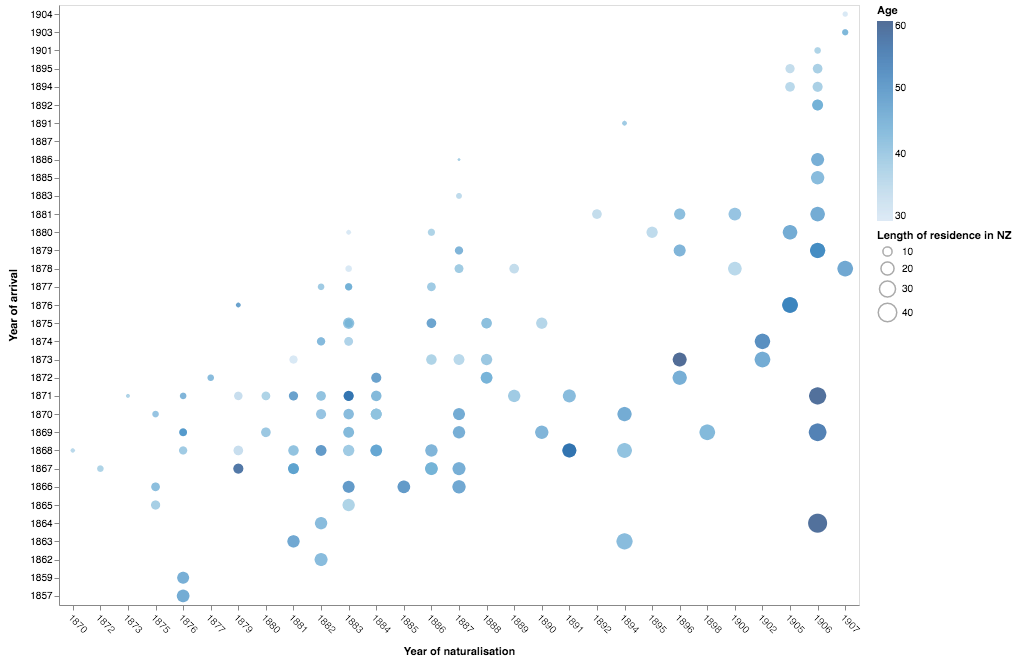

In [5]:
chart = alt.Chart(df).mark_circle().encode(
    x=alt.X('year(ISO date):O', title='Year of naturalisation'),
    y=alt.Y('Year of arrival:O', sort='descending'),
    size='Length of residence in NZ',
    color='Age',
    tooltip=['Name', 'Year of arrival', alt.Tooltip('ISO date', title='Date of naturalisation'), 'Age', alt.Tooltip('Residence city', title='Residence'), 'Occupation']
).transform_filter(
    datum['Year of arrival'] != None
).properties(
    width=800, height=600).configure_axisX(labelAngle=45).configure_axis(titlePadding=10
)

chart

In [6]:
chart.save('chart.html')

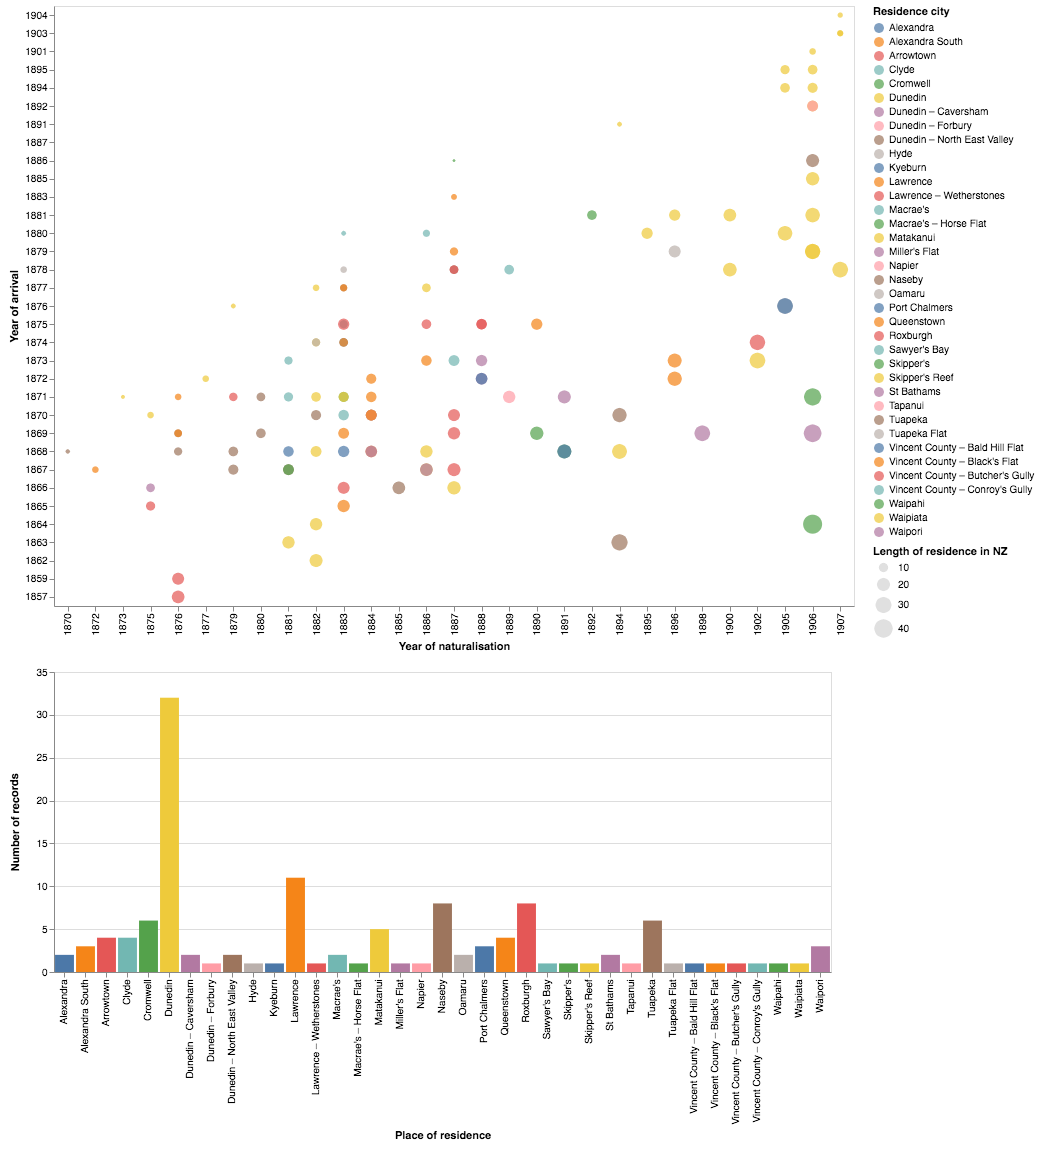

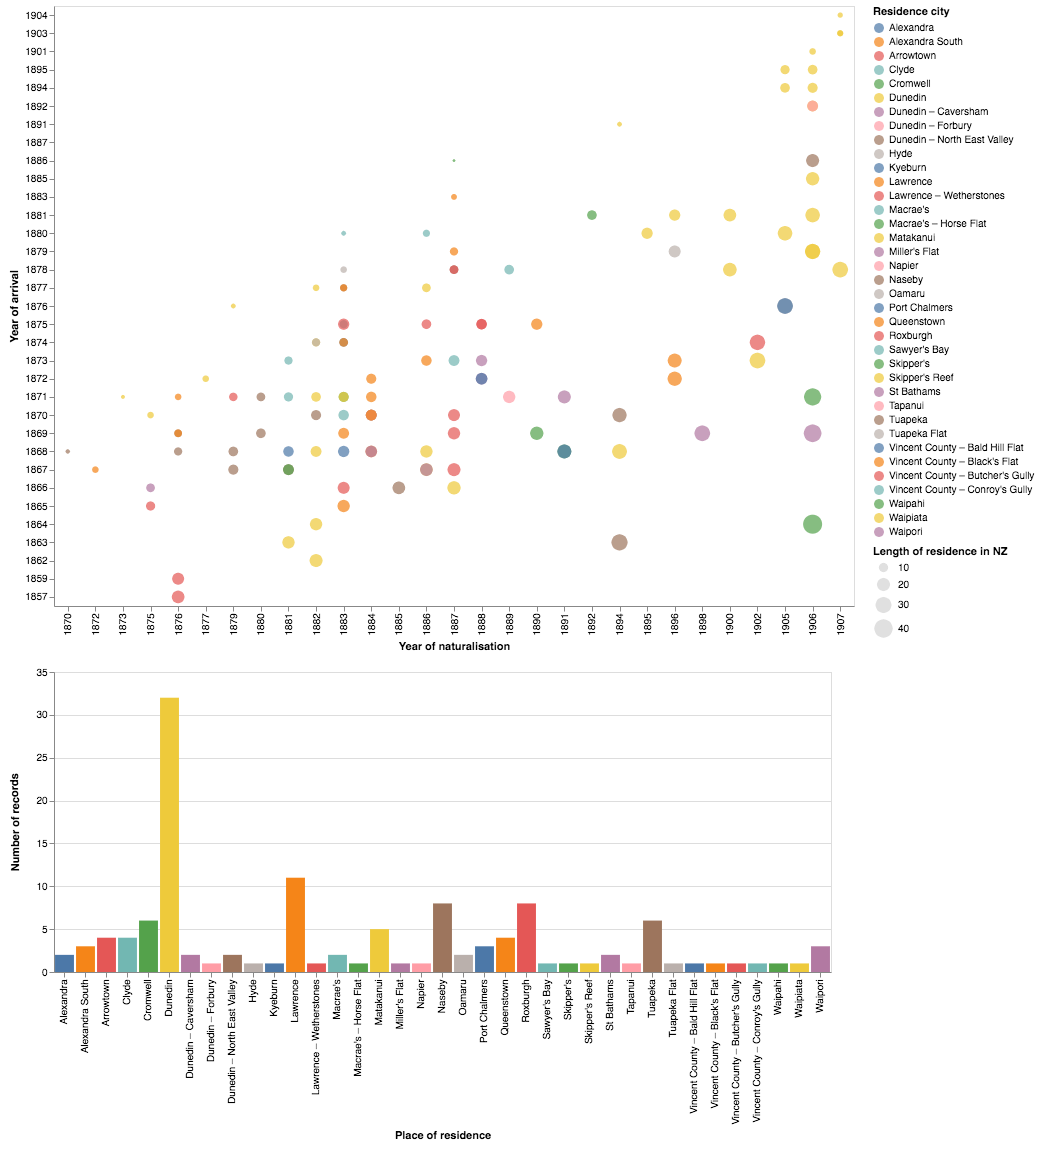

In [108]:
brush = alt.selection(type='interval')

chart1 = alt.Chart(df).mark_circle().encode(
    x=alt.X('year(ISO date):O', title='Year of naturalisation'),
    y=alt.Y('Year of arrival:O', sort='descending'),
    size='Length of residence in NZ',
    color=alt.condition(brush, 'Residence city:N', alt.value('lightgray')),
    tooltip=['Name', 'Year of arrival', alt.Tooltip('ISO date', title='Date of naturalisation'), 'Age', alt.Tooltip('Residence city', title='Residence'), 'Occupation'],
    href=alt.Href('url', type='nominal')
).transform_filter(
    datum['Year of arrival'] != None
).properties(
    width=800, height=600
).transform_calculate(
    url=("http://example.com/" + datum['Age'])
).add_selection(
    brush
)

chart2 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Residence city', axis=alt.Axis(title='Place of residence')),
    y=alt.Y('count()', axis=alt.Axis(title='Number of records')),
    color='Residence city:O',
    tooltip=['Residence city', alt.Tooltip(aggregate='count', type='quantitative', title='Total')]
).transform_filter(
    brush
)

alt.vconcat(chart1, chart2)